## Proyecto Machine Learning - Predicciones Speed Dating

### **Paso 1: Importar las librerías y funciones y cargar los datos**

##### **Librerías**

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.insert(0, "./src/utils")
import bootcampviztools as viz
import ToolBox as tb


from scipy.io import arff # Necesario para leer los datos, ya que vienen en este formato

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

##### **Datos**
Los datos provienen de un estudio realizado por Columbia Business School a partir de un experimento de *speed dating*, es decir, un evento en el que las personas conocen a otra persona en poco tiempo para decidir si quieren seguir conociéndola y a continuación pasan a conocer a otra persona en el mismo espacio de tiempo.   

En este experimento se organizó un total de 8378 citas rápidas, cada persona tuvo 20 citas en total. Se recogen datos da diversa índole, como las preferencias de cada persona de características de su pareja, la percepción que las personas tienen sobre sí mismas y las expectativas que tienen del evento.

In [119]:
data, meta = arff.loadarff("./src/data_sample/speed_dating.arff") # Cargo los datos en formato arff

In [120]:
meta # Información sobre las variables: tipo y valores únicos

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

In [121]:
data # Datos en forma de array

array([(b'0',  1., b'female', 21., 27., 6., b'[4-6]', b'Asian/Pacific Islander/Asian-American', b'European/Caucasian-American', b'0', 2., 4., b'[2-5]', b'[2-5]', b'Law', 35., 20., 20., 20.,  0.,  5., b'[21-100]', b'[16-20]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]',  6.,  8.,  8.,  8.,  8.,  6., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 15., 20., 20., 15., 15., 15., b'[0-15]', b'[16-20]', b'[16-20]', b'[0-15]', b'[0-15]', b'[0-15]', 6., 8., 8., 8., 7., b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', b'[6-8]', 6., 9., 7., 7.,  6.,  5., b'[6-8]', b'[9-10]', b'[6-8]', b'[6-8]', b'[6-8]', b'[0-5]', 9., 2., 8.,  9.,  1.,  1., 5., 1., 5., 6., 9., 1., 10., 10.,  9., 8., 1., b'[9-10]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[0-5]', b'[6-8]', b'[9-10]', b'[0-5]', b'[9-10]', b'[9-10]', b'[9-10]', b'[6-8]', b'[0-5]',  0.14, b'[0-0.33]',  3.,  2., 4., b'[0-4]', b'[0-3]', b'[3-5]', 7.,  6., b'[6-8]', b'[5-6]', 0., b'1', b'0', b'0'),
       (b'0',  1.,

In [122]:
pd.set_option("display.max_columns", None)
df = pd.DataFrame(data) # Paso los datos a un dataframe
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8

Las columnas de tipo "object" vienen en formato "bytes", me ocuparé de ello en el apartado correspondiente.

In [123]:
df.shape

(8378, 123)

*Los datos cuentan con 8378 instancias y 122 variables más un target, a priori es un volumen suficiente para entrenar un modelo.*

### **Paso 2: Del problema de negocio al de Machine Learning**

##### **Problema de negocio**
La app de citas DatingSuccess va a organizar un evento de *speed dating* y quiere que el mayor número de personas posible hagan *match*, es decir, se gusten mutuamente o quieran seguir conociéndose y, sobre todo, con una experiencia positiva. Con este fin, me han facilitado datos que han obtenido gracias a un experimento realizado por Columbia Business School en un evento de *speed dating*.   

A partir de dichos datos, quieren que elabore un modelo que les permita predecir qué citas tendrán éxito, para organizar en la medida de lo posible, el mayor número de citas en el que ambos participantes se gusten mutuamente.   

Además, para no hacer las pruebas para las predicciones a ciegas, me piden que les diga también cuáles son los aspectos más importantes para que una cita llegue a buen fin.

##### **Problema de Machine Learning**
Dadas las peticiones de negocio, voy a entrenar un algoritmo supervisado de clasificación, en este caso binaria, por la naturaleza del target, que pueda predecir lo mejor posible qué citas van a ser exitosas según los datos proporcionados.   

Por otro lado, será necesario hacer una reducción de features y un análisis de su importancia para poder informar a la empresa sobre los principales aspectos que debe tener en cuenta cuando organice las citas.

### **Paso 3: División en conjuntos train, validation y test**

In [124]:
target = "match" # Todavía no voy a separar X e y, pero me guardo el target en una variable

In [125]:
train, val_test = train_test_split(df, test_size= 0.4, random_state=42) # Me quedo con un test del 40% de los datos para luego sacar el conjunto de validación de ahí
val, test = train_test_split(val_test, test_size= 0.5, random_state=42)

In [126]:
sets_names = ["Train", "Validation", "Test"]
sets = [train, val, test]

In [127]:
for set, set_name in zip(sets, sets_names):
    print(f"Dimensiones de {set_name}: {set.shape}")

Dimensiones de Train: (5026, 123)
Dimensiones de Validation: (1676, 123)
Dimensiones de Test: (1676, 123)


### **Paso 4: Distribución del Target**

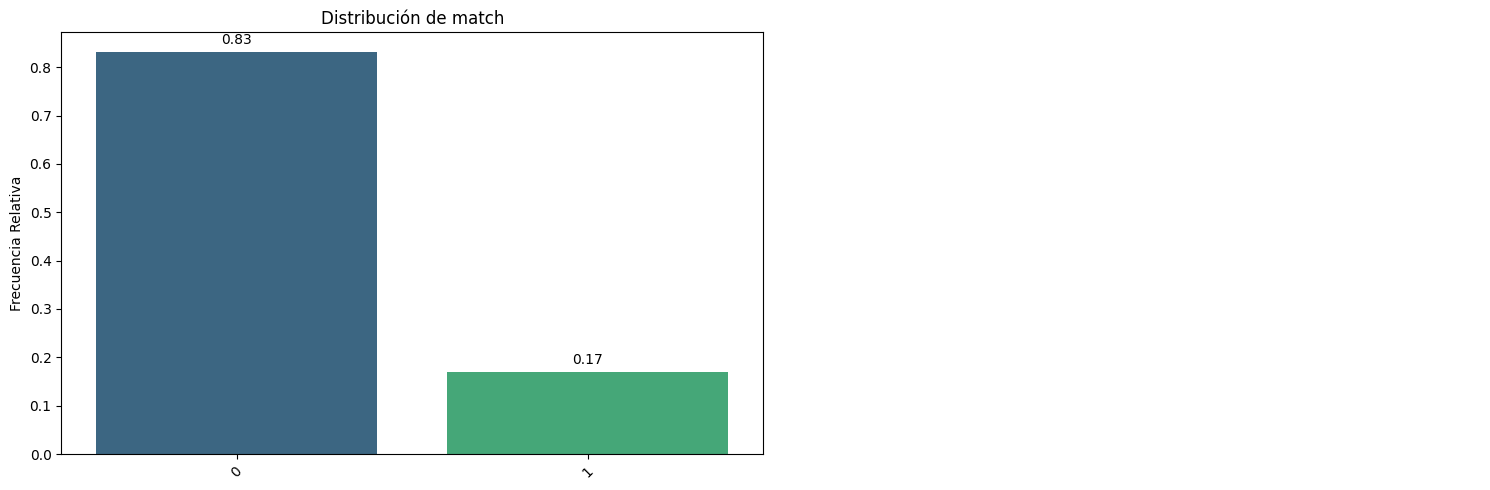

In [128]:
viz.pinta_distribucion_categoricas(train, [target], mostrar_valores=True, relativa=True) # Función de visualización de uno de los módulos que se pueden encontrar en utils

Me encuentro ante un dataset bastante desbalanceado. Hay un número mucho menor de casos de la clase positiva (cita exitosa). Como la clase positiva es la más interesante para negocio, probaré en el momento de tratar los datos y de entrenar y decidir los modelos varios métodos para intentar mitigar los efectos de este desbalanceo.

### **Paso 5: Entender las variables**

Para este paso, son de gran utilidad los metadatos porporcionados en el archivo ARFF. No son datos completos ni contienen una descripción de las variables, pero conociendo el tipo de variable y los valores únicos ya son de ayuda para hacerse una idea general.

In [129]:
meta

Dataset: 'Speed
	has_null's type is nominal, range is ('0', '1')
	wave's type is numeric
	gender's type is nominal, range is ('female', 'male')
	age's type is numeric
	age_o's type is numeric
	d_age's type is numeric
	d_d_age's type is nominal, range is ('[4-6]', '[0-1]', '[2-3]', '[7-37]')
	race's type is nominal, range is ('Asian/Pacific Islander/Asian-American', 'European/Caucasian-American', 'Other', 'Latino/Hispanic American', 'Black/African American')
	race_o's type is nominal, range is ('European/Caucasian-American', 'Asian/Pacific Islander/Asian-American', 'Latino/Hispanic American', 'Other', 'Black/African American')
	samerace's type is nominal, range is ('0', '1')
	importance_same_race's type is numeric
	importance_same_religion's type is numeric
	d_importance_same_race's type is nominal, range is ('[2-5]', '[6-10]', '[0-1]')
	d_importance_same_religion's type is nominal, range is ('[2-5]', '[0-1]', '[6-10]')
	field's type is nominal, range is ('Law', 'law', 'Economics', 'Mas

Puedo observar con un primer vistazo general que hay varias variables binarias, categóricas y, a primer vista, parece que hay numéricas discretas y continuas. Más concretamente se podría apuntar que en la variable "field" hay valores repetidos y algunos que se pueden juntar en grupos más generales o hay variables de las que podemos encontrar tanto la original numérica, como una creada a partir de la misma binneada y convertida en categóricas.

Además, se me ha facilitado una descripción de algunas de las variables, que permite entender tanto las explicadas como el resto, ya que mediante estas descripciones se puede extraer información extrapolable a las demás features de cómo están codificados los nombres de las features:

In [130]:
with open("./src/data_sample/feature_information.txt", "r") as open_file:
    all_text = open_file.read()
    print(all_text)

 * gender: Gender of self  
 * age: Age of self  
 * age_o: Age of partner  
 * d_age: Difference in age  
 * race: Race of self  
 * race_o: Race of partner  
 * samerace: Whether the two persons have the same race or not.  
 * importance_same_race: How important is it that partner is of same race?  
 * importance_same_religion: How important is it that partner has same religion?  
 * field: Field of study  
 * pref_o_attractive: How important does partner rate attractiveness  
 * pref_o_sinsere: How important does partner rate sincerity  
 * pref_o_intelligence: How important does partner rate intelligence  
 * pref_o_funny: How important does partner rate being funny  
 * pref_o_ambitious: How important does partner rate ambition  
 * pref_o_shared_interests: How important does partner rate having shared interests  
 * attractive_o: Rating by partner (about me) at night of event on attractiveness  
 * sincere_o: Rating by partner (about me) at night of event on sincerity  
 * intell

A grandes rasgos, podemos distinguir algunas abreviaturas que se usan:
* Partícula (generalmente sufijo) "\_o": hacen referencia al *partner* o persona con la que se tiene la cita. 
* Empiezan por "d\_": hacen referencia a variables categóricas creadas a partir de una numérica cuando lo que contienen son intervalos de valores (del tipo '[16-20]', '[0-15]', '[21-100]') o, cuando sus valores son numéricos a la "diferencia" en la variable correspondiente con la persona con la que se está teniendo la cita.   

Otro aspecto importante a tener en cuenta a la hora de elegir las features será que hay datos que se han recogido con posterioridad a las citas, estas variables habrá que dejarlas fuera a la hora de construir el modelo, ya que es información con la que la empresa no va a contar a la hora de elegir las personas que tendrán citas. El ejemplo más claro es el de las variables "decision" y "decision_o", que hacen referencia a la decisión de la persona entrevistada con respecto a una cita y a la decisión de la persona con la que ha tenido la cita. Por supuesto, si tenemos esta información sabremos si se ha producido el *match* o no, pero, por desgracia, no podremos contar con esta información antes de que hayan tenido lugar las citas, por lo que habrá que dejar fuera estas variables.

Lo primero que voy a hacer es ir examinando las variables una por una con ayuda de su descripción para ver si contienen información que se puede recabar antes de que tengan lugar las citas o no. Las que no lo sean las guardaré en una lista para excluirlas.

In [131]:
train.head(3)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
2505,b'1',8.0,b'female',24.0,28.0,4.0,b'[4-6]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',1.0,1.0,b'[0-1]',b'[0-1]',b'Social work',20.45,20.45,20.45,18.18,18.18,2.27,b'[21-100]',b'[21-100]',b'[21-100]',b'[16-20]',b'[16-20]',b'[0-15]',5.0,7.0,7.0,6.0,6.0,6.0,b'[0-5]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',20.0,22.5,17.5,22.5,10.0,7.5,b'[16-20]',b'[21-100]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',9.0,7.0,9.0,9.0,7.0,b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',7.0,7.0,7.0,7.0,7.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',9.0,6.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,7.0,8.0,8.0,9.0,9.0,10.0,8.0,1.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.43,b'[0.33-1]',5.0,NaN,5.0,b'[5-6]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
2620,b'1',9.0,b'female',24.0,23.0,1.0,b'[0-1]',b'European/Caucasian-American',b'European/Caucasian-American',b'1',9.0,9.0,b'[6-10]',b'[6-10]',b'Clinical Psychology',25.64,17.95,15.38,20.51,10.26,10.26,b'[21-100]',b'[16-20]',b'[16-20]',b'[21-100]',b'[0-15]',b'[0-15]',4.0,5.0,5.0,4.0,5.0,4.0,b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',16.0,16.0,20.0,16.0,18.0,14.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',9.0,10.0,8.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[9-10]',10.0,8.0,8.0,8.0,8.0,7.0,b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',8.0,6.0,6.0,9.0,6.0,6.0,4.0,8.0,7.0,9.0,9.0,6.0,9.0,5.0,7.0,9.0,4.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',-0.07,b'[-1-0]',7.0,NaN,1.0,b'[7-10]',b'[0-3]',b'[0-2]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
4634,b'1',12.0,b'female',27.0,27.0,0.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',1.0,3.0,b'[0-1]',b'[2-5]',b'Elementary Education',17.00,19.00,18.00,17.00,11.00,18.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20]',8.0,9.0,9.0,8.0,7.0,7.0,b'[6-8]',b'[9-10]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',10.0,20.0,20.0,15.0,20.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[16-20

In [132]:
print(train.columns.to_list())

['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere', '

In [133]:
columns_to_exclude = ['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'like', 'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision', 'decision_o']

In [134]:
print(f"Nº inicial de variables: {len(train.columns) - 1}")
print(f"Nº real de variables utilizables en el modelo: {len(train.columns) - len(columns_to_exclude + [target])}")

Nº inicial de variables: 122
Nº real de variables utilizables en el modelo: 91


Me sigue quedando un gran número de variables (aunque una gran parte de ellas están tanto en su versión numérica como categórica), pero ya tengo solo las que relamente son posibles features para el modelo.

#### Automatizar la exclusión de las variables
Voy a crear un Transformador que excluya las variables no deseadas, que posteriormente añadiré además al pipeline definitivo.

In [135]:
train_bck = train.copy()

In [136]:
pipe_exclude_columns = ColumnTransformer([("exclude", "drop", columns_to_exclude)], remainder= "passthrough") # Selecciona únicamente las columnas que no están incluidas en la lista que se le pasa

In [137]:
print(f"Dimensiones de Train reducido: {pipe_exclude_columns.fit_transform(train).shape}")

Dimensiones de Train reducido: (5026, 92)


En este punto no me voy a deshacer de las variables que no necesito de esta manera porque es menos limpio, ya que después tendría que reconstruir el dataframe, lo usaré a su debido tiempo en el pipeline final.

In [139]:
train = train.drop(columns=columns_to_exclude).copy()

#### Análisis de algunos elementos generales del dataset:

In [140]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wave,5026.0,11.412853,5.975444,1.00,7.00,11.00,15.00,21.0
age,4971.0,26.337156,3.565679,18.00,24.00,26.00,28.00,55.0
age_o,4967.0,26.369438,3.562714,18.00,24.00,26.00,28.00,55.0
d_age,5026.0,4.177278,4.572534,0.00,1.00,3.00,5.00,37.0
importance_same_race,4985.0,3.758877,2.822184,0.00,1.00,3.00,6.00,10.0
importance_same_religion,4985.0,3.624674,2.802657,1.00,1.00,3.00,6.00,10.0
pref_o_attractive,4978.0,22.546452,12.405819,0.00,15.00,20.00,25.00,100.0
pref_o_sincere,4978.0,17.356943,6.824764,0.00,15.00,18.18,20.00,60.0
pref_o_intelligence,4978.0,20.289725,6.796683,0.00,17.50,20.00,23.26,50.0
pref_o_funny,4973.0,17.483441,6.082899,0.00,15.00,18.00,20.00,50.0


In [142]:
train.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
                                    ...   
expected_num_matches               float64
d_expected_happy_with_sd_people     object
d_expected_num_interested_in_me     object
d_expected_num_matches              object
match                               object
Length: 92, dtype: object